# Lab 3 : Working with Neural Networks

---


Total Points: **100**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs Aroof Aimen (2018csz0001@iitrpr.ac.in), Vidhya Kamakshi (2017csz0005@iitrpr.ac.in)

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run 
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.
11. **Please make a 10-minute video explaining your lab. Please provide a link to your video shared via the google drive in your notebook itslef (in a seperate text block). Follow the following naming convention: Name_rollnumber_NB.ipynb and Name_rollnumber_video.mkv respectively.** 
12. **Submissions without links for the videos, incorrect naming conventions, or incorrect folder arrangement will not be evaluated.**


In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Boston house Price Dataset for the regression problem, and for multi-class classification, we will consider Fashion-MNIST Dataset. For Boston house Price dataset details visit - https://scikit-learn.org/stable/datasets/toy_dataset.html. For Fashion-MNIST dataset you may get it using keras (see documentation) Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist


---



Section 1:  **(Total points = 50)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the house prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) *Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section*

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Also, show the coorelation of each column with the target values in the dataset using multi-plots. **(3 point)**
2. Perform data pre-processing operations like standardization and splitting (80:20) of data.  **(2 points)**
3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh actionations at each layer of MLP for the user.  **( 15 points)**
4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(15 points)**
5. Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**
6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001].  **(5 points)**
7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Comment on your observations. **(3+2 = 5 points)**

https://drive.google.com/file/d/1O8-LV4iuGshTxGx1B70xSrrceC06Uldu/view?usp=sharing

In [ ]:
#Declaration Block
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style
style.use('dark_background')

In [ ]:
housing = load_boston() # Loading the housing data
housing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:

data = pd.DataFrame(housing["data"], columns = housing['feature_names']) # Input data 
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# Part01: 
Dataset Exploration

In [ ]:

housing["feature_names"] # List of features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
target = pd.DataFrame(housing["target"],columns = ['TARGET']) # Ground truth house prices for each row of data
target

,TARGET
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:

data[data.isnull()].sum()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
dtype: float64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:

data['TARGET'] = housing['target']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


show the coorelation of each column with the target values in the dataset using multi-plots

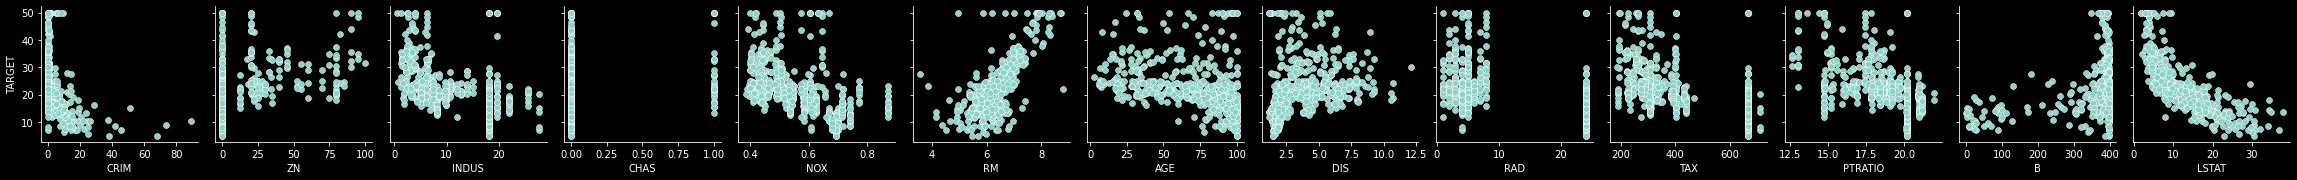

In [ ]:

g = sns.pairplot(data=data,
                  x_vars= housing["feature_names"],
                  y_vars=['TARGET'])



plt.show()


In [ ]:
correlations = data.corr()
# print(correlations)
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


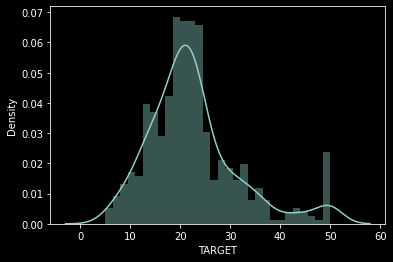

In [ ]:
sns.distplot(data['TARGET'],bins=30)
plt.show()

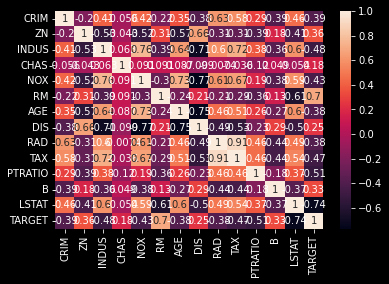

In [ ]:
# sns.set(rc={'figure.figsize': (12,9)})
sns.heatmap(correlations,annot = True)
plt.show()

As correlation coefficient value close to 1 showa positive correlation between them and close to -1 shows negative correlation.

# Part02:

Standardize & Splitting in 80:20

In [ ]:
# Standardize and Splitting Dataset

for col in data:
    
    data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)

# data
# splitting 
''' divide the dataframe into train and test dataframes '''
def self_train_and_test_split(df,fraction):
	train_df = df.sample(frac = fraction)
	test_df = df.drop(train_df.index)
	return train_df,test_df


train_data,test_data = self_train_and_test_split(data,0.8)


# print(train_data)
# print(test_data)

train_data
test_data

print(train_data.shape)
print(test_data.shape)

# data.head()

(405, 14)
(101, 14)


In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


# Part03,04,05:

Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh actionations at each layer of MLP for the user.

Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions.

Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. 

In [ ]:
''' preprocessing data '''
def pre_process_data(dataframe):
    data = []
    for col in dataframe:
       data.append(np.array(dataframe[col]))
    # print(data[0].shape)
    for i,d in enumerate(data):
        data[i].shape = (data[i].shape[0],1)
    data = np.concatenate(data, axis = 1)
    # print("data", data)
    X = data[:,:-1]
    Y = data[:,-1]
    # Y.shape = (Y.shape[0],1)
    return X,Y


X_train,Y_train = pre_process_data(train_data)
X_test,Y_test = pre_process_data(test_data)


In [ ]:
# from sklearn.metrics import mean_squared_error
''' Implemnted Neural Network class for creating MLP which facilitates the hidden layers,output layers, activation function, opt_algo and epochs. '''
class NeuralNetwork:
    def __init__(self,
                num_hidden,
                num_neurons_per_layer,
                activation_func_hidden,
                num_neurons_out_layer=1,
                activation_func_output="softmax",
                opt_algo="SGD",
                loss_func="mean_square_error",
                learning_rate=0.01,
                num_epochs=200):
        self.num_hidden = num_hidden
        self.num_neurons_per_layer = num_neurons_per_layer
        self.activation_func_hidden = activation_func_hidden
        if activation_func_hidden == 'sigmoid':
            self.activation_func_output = self.sig
            self.derivative_act_func_output = self.gradSig
        elif activation_func_hidden == 'tanh':
            self.activation_func_output = self.tanh
            self.derivative_act_func_output = self.gradTanh
        elif activation_func_hidden == 'relu':
            self.activation_func_output = self.relu
            self.derivative_act_func_output = self.reluDerivative
        self.num_neurons_out_layer = num_neurons_out_layer
        self.opt_algo = opt_algo
        self.loss_func = loss_func
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weight_dict = {}
        self.layer_sizes = [13,self.num_neurons_per_layer,self.num_neurons_out_layer]
        self.training_error_sgd = []
        self.training_error_bgd = []
        # for i in range(self.num_hidden):
        #     self.layer_sizes.append(self.num_neurons_per_layer)
        # self.layer_sizes.append(self.num_neurons_out_layer)

        if self.opt_algo == 'SGD':
            self.batch_size = 1
        # else: 
        #     self.batch_size = 405 # default mini batch
    
    ''' forward propagation '''
    def forward_propagation(self,X_train, params):
        layers = len(params)//2
        forward_prop_val = {}
        for i in range(1, layers+1):
            if i==1:
                forward_prop_val['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
                forward_prop_val['A' + str(i)] = self.activation_func_output(forward_prop_val['Z' + str(i)])
            else:
                forward_prop_val['Z' + str(i)] = np.dot(params['W' + str(i)], forward_prop_val['A' + str(i-1)]) + params['B' + str(i)]
                if i==layers:
                    forward_prop_val['A' + str(i)] = forward_prop_val['Z' + str(i)]
                else:
                    forward_prop_val['A' + str(i)] = self.activation_func_output(forward_prop_val['Z' + str(i)])
        return forward_prop_val
    

    ''' error computation  '''
    def compute_error(self,values, Y_train):
        layers = len(values)//2
        Y_pred = values['A' + str(layers)]

        ''' mean square error '''
        cost = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
        
        return cost

    ''' backward propagation '''
    def backward_propagation(self,weight_params, forward_val, X_train, Y_train):
        layers = len(weight_params)//2
        m = len(Y_train)
        gradients = {}
        for i in range(layers,0,-1):
            if i==layers:
                derivative_A = 1/m * (forward_val['A' + str(i)] - Y_train)
                derivative_Z = derivative_A
            else:
                derivative_A = np.dot(weight_params['W' + str(i+1)].T, derivative_Z)
                
                derivative_Z = np.multiply(derivative_A, self.derivative_act_func_output(forward_val['A' + str(i)] ))
            if i==1:
                gradients['W' + str(i)] = 1/m * np.dot(derivative_Z, X_train.T)
                gradients['B' + str(i)] = 1/m * np.sum(derivative_Z, axis=1, keepdims=True)
            else:
                gradients['W' + str(i)] = 1/m * np.dot(derivative_Z,forward_val['A' + str(i-1)].T)
                gradients['B' + str(i)] = 1/m * np.sum(derivative_Z, axis=1, keepdims=True)
        return gradients

    ''' updating weights '''
    def update_weights(self,params, gradients):
        layers = len(params)//2
        params_updated = {}
        p = self.learning_rate

        if self.learning_rate == 0.5:
            p = self.learning_rate/(1+self.num_epochs*100)

        for i in range(1,layers+1):
            
            params_updated['W' + str(i)] = params['W' + str(i)] - p * gradients['W' + str(i)]
            params_updated['B' + str(i)] = params['B' + str(i)] - p * gradients['B' + str(i)]
        return params_updated


    def plot(self):
        epochs = [x for x in range(0,self.num_epochs)]

        if self.opt_algo == 'SGD':
            plt.plot(epochs,self.training_error_sgd, label = self.activation_func_hidden)
            plt.xlabel('Epochs')
            plt.ylabel('Train Loss')
            plt.grid(True)
            plt.title('Train Error/Epochs Stochastic GD')
            plt.legend()

            # sns.lineplot()
        elif self.opt_algo == 'BGD':
            plt.plot(epochs,self.training_error_bgd, label = self.activation_func_hidden)
            plt.xlabel('Epochs')
            plt.ylabel('Train Loss')
            plt.grid(True)
            plt.title('Train Error/Epochs Batch GD')
            plt.legend()

    def fit(self,X_train,Y_train):

        if self.opt_algo == 'SGD':
            self.train_sgd(X_train,Y_train)
        else: self.train_bgd(X_train,Y_train)


    ''' SGD '''
    def train_sgd(self,X_train,Y_train):
        weights = self.initialize_params(self.layer_sizes)

        # train_acc = list()
        # test_acc = list()

        for i in range(self.num_epochs):
            # p = self.learning_rate/(1+epochs)
            X = np.asarray(X_train)
            Y = np.asarray(Y_train)
            perm = np.arange(X.shape[0])
            np.random.shuffle(perm)
            X = X[perm]
            Y = Y[perm]

            train_loss = 0
            test_loss = 0

            num_batches = int(np.ceil(float(X.shape[0]) / self.batch_size))
            for batch_num in range(num_batches):
                
                XBatch = np.asarray(X[batch_num*self.batch_size: (batch_num+1)*self.batch_size])
                YBatch = np.asarray(Y[batch_num*self.batch_size: (batch_num+1)*self.batch_size])

                # Calculate the activations after the feedforward pass
                values = self.forward_propagation(XBatch.T, weights)
                cost = self.compute_error(values, YBatch.T)
                grads = self.backward_propagation(weights, values,XBatch.T, YBatch.T)
                weights = self.update_weights(weights, grads)
                

                train_loss += cost

            train_loss /= num_batches

            
            self.training_error_sgd.append(train_loss)
            print('Error cost at epoch ' + str(i+1) + ' = ' + str(cost) + ' train_loss = '+ str(train_loss) + '\n')

        self.weights = weights
	
        return weights	

    ''' BGD '''
    def train_bgd(self,X_train, Y_train):
        # print('train_bgd')
        weights = self.initialize_params(self.layer_sizes)
        for i in range(self.num_epochs):
            values = self.forward_propagation(X_train.T, weights)
            cost = self.compute_error(values, Y_train.T)
            grads = self.backward_propagation(weights, values,X_train.T, Y_train.T)
            weights = self.update_weights(weights, grads)
            print('Error cost at epoch ' + str(i+1) + ' = ' + str(cost) + '\n')
            self.training_error_bgd.append(cost)

        self.weights = weights
        return weights


    ''' compute_accuracy '''
    def compute_accuracy(self,X_train, X_test, Y_train, Y_test):
        values_train = self.forward_propagation(X_train.T, self.weights)
        values_test = self.forward_propagation(X_test.T, self.weights)
        # train_acc = mean_squared_error(Y_train, values_train['A' + str(len(self.layer_sizes)-1)].T)
        # test_acc = mean_squared_error(Y_test, values_test['A' + str(len(self.layer_sizes)-1)].T)
        train_accuracy = self.compute_error(values_train,Y_train.T)
        test_accuracy = self.compute_error(values_test,Y_test.T)
        # train_acc = np.mean((Y_train-values_train['A' + str(len(self.layer_sizes)-1)].T)**2)
        # test_acc = np.mean((Y_test-values_test['A' + str(len(self.layer_sizes)-1)].T)**2)
        return 1-train_accuracy, 1-test_accuracy

    
    
    @staticmethod
    def initialize_params(layer_sizes):
        weights = {}
        for i in range(1, len(layer_sizes)):
            weights['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
            weights['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
        return weights

    @staticmethod
    def gradSig(x):
        return (1/(1+np.exp(-x))) * (1 - (1/(1+np.exp(-x))))

    @staticmethod
    def sig(x):
        return (1/(1+np.exp(-x)))

    @staticmethod
    def tanh(x):
        return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
        # dt=1-t**2
        # return t,dt

    @staticmethod
    def gradTanh(x):
        t = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
        dt=1-t**2
        return dt

    @staticmethod
    def reluDerivative(x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    @staticmethod
    def relu(x):
        x[x<=0] = 0
        return x

In [ ]:
NUM_EPOCHS = 100
LEARNING_RATE = 0.01
NUM_NEURONS_OUTPUT_LAYER = 1


In [ ]:

nn_sgd = NeuralNetwork(
        num_hidden = 1,
        num_neurons_per_layer = 15,
        activation_func_hidden = 'sigmoid',
        num_neurons_out_layer=1,
        activation_func_output="softmax",
        opt_algo="SGD",
        loss_func="mean_square_error", 
        learning_rate=LEARNING_RATE,
        num_epochs=NUM_EPOCHS)

In [ ]:
nn_sgd.fit(X_train,Y_train)

Error cost at epoch 1 = 0.10829582026406011 train_loss = 0.46925535019043346

Error cost at epoch 2 = 0.2284822001086449 train_loss = 0.454089833144613

Error cost at epoch 3 = 0.03654665290047666 train_loss = 0.335230880669382

Error cost at epoch 4 = 0.011506369240720623 train_loss = 0.22734975949498412

Error cost at epoch 5 = 0.014252891303664693 train_loss = 0.1807207144524819

Error cost at epoch 6 = 0.015475171369383454 train_loss = 0.1584301688444791

Error cost at epoch 7 = 0.002686014403523323 train_loss = 0.15015058817646568

Error cost at epoch 8 = 0.06080505712344461 train_loss = 0.14686176144909482

Error cost at epoch 9 = 1.1749882304967014 train_loss = 0.14412791186761656

Error cost at epoch 10 = 0.02167318219781677 train_loss = 0.1416568874418294

Error cost at epoch 11 = 5.2071607233519894e-06 train_loss = 0.14179279006898549

Error cost at epoch 12 = 6.640924176843738e-05 train_loss = 0.14091542635095938

Error cost at epoch 13 = 0.03083552505183797 train_loss = 0.1

In [ ]:
train_acc, test_acc = nn_sgd.compute_accuracy(X_train, X_test, Y_train, Y_test)  #get training and test accuracy
print('Testing accuracy = ' + str(test_acc))

Testing accuracy = 0.8374885122173904


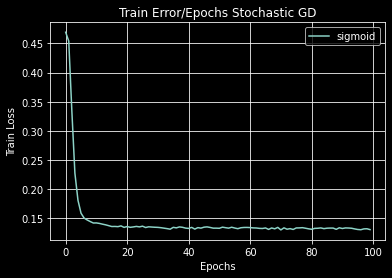

In [ ]:
nn_sgd.plot()

In [ ]:
nn_sgd = NeuralNetwork(
        num_hidden = 1,
        num_neurons_per_layer = 15,
        activation_func_hidden = 'tanh',
        num_neurons_out_layer=1,
        activation_func_output="softmax",
        opt_algo="SGD",
        loss_func="mean_square_error", 
        learning_rate=LEARNING_RATE,
        num_epochs=NUM_EPOCHS)

In [ ]:
nn_sgd.fit(X_train,Y_train)

Error cost at epoch 1 = 0.028047166767231572 train_loss = 0.31733275786897186

Error cost at epoch 2 = 0.16599342758430424 train_loss = 0.14961645156020614

Error cost at epoch 3 = 0.06230675966944704 train_loss = 0.1436504269784162

Error cost at epoch 4 = 0.5220855801790149 train_loss = 0.13677961869705704

Error cost at epoch 5 = 0.09087447127294233 train_loss = 0.1362658190824384

Error cost at epoch 6 = 0.012996158409072816 train_loss = 0.13336706814775928

Error cost at epoch 7 = 0.1834922296296976 train_loss = 0.1293892072386172

Error cost at epoch 8 = 0.001690219692575011 train_loss = 0.13026766889362865

Error cost at epoch 9 = 0.01733224057220127 train_loss = 0.12908938848114518

Error cost at epoch 10 = 0.09231277768439207 train_loss = 0.12591576007915103

Error cost at epoch 11 = 0.002410828807451194 train_loss = 0.12421143569000022

Error cost at epoch 12 = 0.05944196957779518 train_loss = 0.12498797229543995

Error cost at epoch 13 = 0.018902247811386417 train_loss = 0.1

In [ ]:
train_acc, test_acc = nn_sgd.compute_accuracy(X_train, X_test, Y_train, Y_test)  #get training and test accuracy
print('Testing accuracy = ' + str(test_acc))

Testing accuracy = 0.9012273967973087


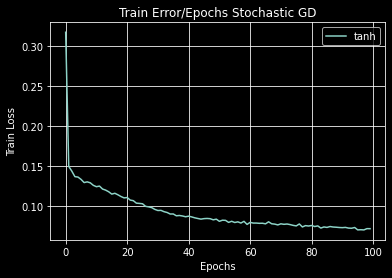

In [ ]:
nn_sgd.plot()

In [ ]:
nn_bgd = NeuralNetwork(
        num_hidden = 1,
        num_neurons_per_layer = 15,
        activation_func_hidden = 'sigmoid',
        num_neurons_out_layer=1,
        activation_func_output="softmax",
        opt_algo="BGD",
        loss_func="mean_square_error",
        learning_rate=LEARNING_RATE,
        num_epochs=100)

In [ ]:
nn_bgd.fit(X_train,Y_train)

Error cost at epoch 1 = 0.46048452026201137

Error cost at epoch 2 = 0.46048420687204494

Error cost at epoch 3 = 0.46048389355319314

Error cost at epoch 4 = 0.4604835803054394

Error cost at epoch 5 = 0.46048326712876697

Error cost at epoch 6 = 0.46048295402315903

Error cost at epoch 7 = 0.4604826409885989

Error cost at epoch 8 = 0.46048232802506983

Error cost at epoch 9 = 0.46048201513255527

Error cost at epoch 10 = 0.46048170231103835

Error cost at epoch 11 = 0.4604813895605023

Error cost at epoch 12 = 0.4604810768809305

Error cost at epoch 13 = 0.4604807642723062

Error cost at epoch 14 = 0.4604804517346129

Error cost at epoch 15 = 0.4604801392678336

Error cost at epoch 16 = 0.4604798268719518

Error cost at epoch 17 = 0.46047951454695074

Error cost at epoch 18 = 0.4604792022928137

Error cost at epoch 19 = 0.4604788901095241

Error cost at epoch 20 = 0.46047857799706526

Error cost at epoch 21 = 0.4604782659554203

Error cost at epoch 22 = 0.4604779539845729

Error cos

In [ ]:
train_acc, test_acc = nn_bgd.compute_accuracy(X_train, X_test, Y_train, Y_test)  #get training and test accuracy
print('Testing accuracy = ' + str(test_acc))

Testing accuracy = 0.3409189041705083


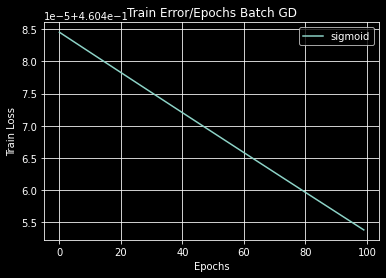

In [ ]:
nn_bgd.plot()

In [ ]:
nn_bgd = NeuralNetwork(
        num_hidden = 1,
        num_neurons_per_layer = 15,
        activation_func_hidden = 'tanh',
        num_neurons_out_layer=1,
        activation_func_output="softmax",
        opt_algo="BGD",
        loss_func="mean_square_error",
        learning_rate=LEARNING_RATE,
        num_epochs=NUM_EPOCHS)

In [ ]:
nn_bgd.fit(X_train,Y_train)

Error cost at epoch 1 = 0.4613560755429367

Error cost at epoch 2 = 0.461355876018303

Error cost at epoch 3 = 0.4613556765023134

Error cost at epoch 4 = 0.46135547699496743

Error cost at epoch 5 = 0.4613552774962636

Error cost at epoch 6 = 0.46135507800620135

Error cost at epoch 7 = 0.4613548785247796

Error cost at epoch 8 = 0.4613546790519974

Error cost at epoch 9 = 0.46135447958785386

Error cost at epoch 10 = 0.4613542801323479

Error cost at epoch 11 = 0.4613540806854788

Error cost at epoch 12 = 0.4613538812472453

Error cost at epoch 13 = 0.46135368181764674

Error cost at epoch 14 = 0.46135348239668217

Error cost at epoch 15 = 0.46135328298435035

Error cost at epoch 16 = 0.4613530835806506

Error cost at epoch 17 = 0.46135288418558185

Error cost at epoch 18 = 0.4613526847991432

Error cost at epoch 19 = 0.4613524854213338

Error cost at epoch 20 = 0.4613522860521525

Error cost at epoch 21 = 0.46135208669159855

Error cost at epoch 22 = 0.46135188733967086

Error cost 

In [ ]:
train_acc, test_acc = nn_bgd.compute_accuracy(X_train, X_test, Y_train, Y_test)  #get training and test accuracy
print('Testing accuracy = ' + str(test_acc))

Testing accuracy = 0.33936491277011804


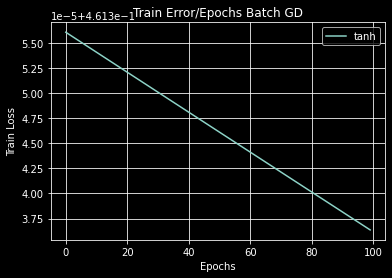

In [ ]:
nn_bgd.plot()

# Observations: 



*  SGD has higher testing accuracy as compared to BGD for 100 epochs and learning rate = 0.01.  
*   It is evident that for stochastic due to batch size = 1 error decreases rapidly as compared to batch gradient descent because in batch gradient entire dataset has to paas for each epoch therefore there is very less change in error in every epoch as compared to SGD. Hence SGD converged faster as compared to BGD.
* tanh activation function has better testing accuracy as compared to sigmoid function in SGD





In [ ]:
learning_rates = [ 0.0001, 0.001,0.01,0.1,0.5 ]

training_error = []

testing_accuracy = []

'''  best activation function '''

activation_hidden = 'tanh' 

''' best training method '''
best_algo = 'SGD'


Error cost at epoch 1 = 0.19968345233216292 train_loss = 0.4592269031062223

Error cost at epoch 2 = 0.003835007018729747 train_loss = 0.45890458393389433

Error cost at epoch 3 = 0.8527419911256143 train_loss = 0.45856987934571086

Error cost at epoch 4 = 0.010457811742666374 train_loss = 0.45821553509035057

Error cost at epoch 5 = 0.9746396459841253 train_loss = 0.45784005747797385

Error cost at epoch 6 = 0.0787015008855508 train_loss = 0.45743980060898554

Error cost at epoch 7 = 0.003133593686654286 train_loss = 0.45700823712360106

Error cost at epoch 8 = 0.0005861612584985187 train_loss = 0.45653941914862856

Error cost at epoch 9 = 0.4895496768668226 train_loss = 0.45602693356476837

Error cost at epoch 10 = 0.4884375118783715 train_loss = 0.4554647506249702

Error cost at epoch 11 = 0.05295853435802876 train_loss = 0.4548459258986479

Error cost at epoch 12 = 0.000449538074790559 train_loss = 0.4541629435965934

Error cost at epoch 13 = 0.06048681480141885 train_loss = 0.4534

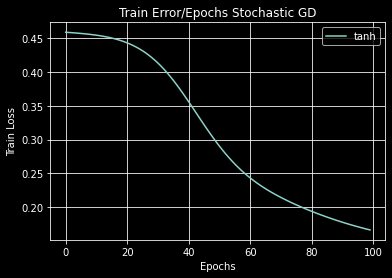

In [ ]:
nn_lr1  = NeuralNetwork(
        num_hidden = 1,
        num_neurons_per_layer = 15,
        activation_func_hidden = activation_hidden,
        num_neurons_out_layer=1,
        activation_func_output="softmax",
        opt_algo="SGD",
        loss_func="mean_square_error",
        learning_rate=0.0001,
        num_epochs=NUM_EPOCHS)

nn_lr1.fit(X_train,Y_train)
train_acc, test_acc = nn_lr1.compute_accuracy(X_train, X_test, Y_train, Y_test)  #get training and test accuracy
print('Testing accuracy = ' + str(test_acc))
testing_accuracy.append(test_acc)
nn_lr1.plot()

Error cost at epoch 1 = 4.480090734707985 train_loss = 0.4587116912527468

Error cost at epoch 2 = 0.08998857725164701 train_loss = 0.45235338807691405

Error cost at epoch 3 = 0.5119608338603234 train_loss = 0.43554691831714326

Error cost at epoch 4 = 0.0023137836642994495 train_loss = 0.39457372842507077

Error cost at epoch 5 = 0.0029391763693583104 train_loss = 0.32822874375922284

Error cost at epoch 6 = 0.11729192527818708 train_loss = 0.26586127793262104

Error cost at epoch 7 = 0.006873572000834902 train_loss = 0.22682824533555226

Error cost at epoch 8 = 0.01671686768386197 train_loss = 0.20261438609887117

Error cost at epoch 9 = 0.08596727374165755 train_loss = 0.18444168893526738

Error cost at epoch 10 = 0.3095213848687923 train_loss = 0.17043138298197022

Error cost at epoch 11 = 0.03544439874926276 train_loss = 0.15992293507789515

Error cost at epoch 12 = 0.2346840357640006 train_loss = 0.15275825211964691

Error cost at epoch 13 = 0.0005426208747296511 train_loss = 0.

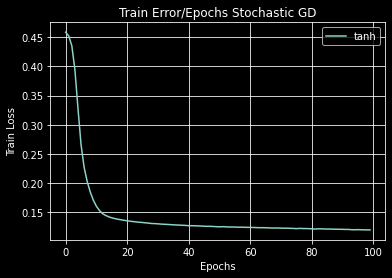

In [ ]:
nn_lr2  = NeuralNetwork(
        num_hidden = 1,
        num_neurons_per_layer = 15,
        activation_func_hidden = activation_hidden,
        num_neurons_out_layer=1,
        activation_func_output="softmax",
        opt_algo="SGD",
        loss_func="mean_square_error",
        learning_rate=0.001,
        num_epochs=NUM_EPOCHS)

nn_lr2.fit(X_train,Y_train)
train_acc, test_acc = nn_lr2.compute_accuracy(X_train, X_test, Y_train, Y_test)  #get training and test accuracy
print('Testing accuracy = ' + str(test_acc))
testing_accuracy.append(test_acc)
nn_lr2.plot()

Error cost at epoch 1 = 0.06396591093585692 train_loss = 0.3335164688757413

Error cost at epoch 2 = 0.12056019988207041 train_loss = 0.15985829064783927

Error cost at epoch 3 = 0.007339818782976019 train_loss = 0.14235063188508043

Error cost at epoch 4 = 0.055616172260368246 train_loss = 0.13707385712761283

Error cost at epoch 5 = 0.1769967889907197 train_loss = 0.13464870494377745

Error cost at epoch 6 = 0.00013844120856311437 train_loss = 0.13015603357756253

Error cost at epoch 7 = 0.0018424857341845739 train_loss = 0.1277909808093852

Error cost at epoch 8 = 0.22500200592329125 train_loss = 0.12413248039766882

Error cost at epoch 9 = 0.00033502510429392086 train_loss = 0.12379184834504432

Error cost at epoch 10 = 0.014805606107760234 train_loss = 0.11772312724198694

Error cost at epoch 11 = 0.5705116794022329 train_loss = 0.11575998590247737

Error cost at epoch 12 = 0.015478492119292126 train_loss = 0.1157300456097178

Error cost at epoch 13 = 0.6297057843203913 train_loss

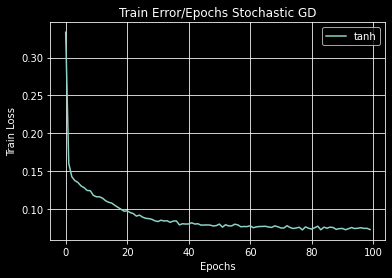

In [ ]:
nn_lr3 = NeuralNetwork(
        num_hidden = 1,
        num_neurons_per_layer = 15,
        activation_func_hidden = activation_hidden,
        num_neurons_out_layer=1,
        activation_func_output="softmax",
        opt_algo="SGD",
        loss_func="mean_square_error",
        learning_rate=0.01,
        num_epochs=NUM_EPOCHS)

nn_lr3.fit(X_train,Y_train)
train_acc, test_acc = nn_lr2.compute_accuracy(X_train, X_test, Y_train, Y_test)  #get training and test accuracy
print('Testing accuracy = ' + str(test_acc))
testing_accuracy.append(test_acc)
nn_lr3.plot()

Error cost at epoch 1 = 0.2042248671880143 train_loss = 0.2286277829616801

Error cost at epoch 2 = 0.1294549937741317 train_loss = 0.18467687992777537

Error cost at epoch 3 = 0.012754163055955765 train_loss = 0.17048292238703366

Error cost at epoch 4 = 0.09853479576103202 train_loss = 0.1630728075464189

Error cost at epoch 5 = 0.009100673898280117 train_loss = 0.14036151418897963

Error cost at epoch 6 = 0.047885409082477036 train_loss = 0.13793680945805142

Error cost at epoch 7 = 0.00034415615904294643 train_loss = 0.13572527589483516

Error cost at epoch 8 = 0.07719568539708235 train_loss = 0.13806807695642914

Error cost at epoch 9 = 0.011107673793745948 train_loss = 0.1300980341536349

Error cost at epoch 10 = 0.17784305219735588 train_loss = 0.1392418416641255

Error cost at epoch 11 = 0.022323036464009665 train_loss = 0.13600880278524727

Error cost at epoch 12 = 0.0013621692108102118 train_loss = 0.1257061759819955

Error cost at epoch 13 = 0.012566785897771144 train_loss =

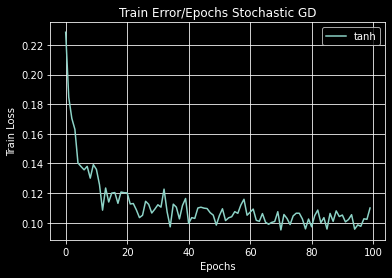

In [ ]:
nn_lr4 = NeuralNetwork(
        num_hidden = 1,
        num_neurons_per_layer = 15,
        activation_func_hidden = activation_hidden,
        num_neurons_out_layer=1,
        activation_func_output="softmax",
        opt_algo="SGD",
        loss_func="mean_square_error",
        learning_rate=0.1,
        num_epochs=NUM_EPOCHS)

nn_lr4.fit(X_train,Y_train)
train_acc, test_acc = nn_lr4.compute_accuracy(X_train, X_test, Y_train, Y_test)  #get training and test accuracy
print('Testing accuracy = ' + str(test_acc))
testing_accuracy.append(test_acc)
nn_lr4.plot()

Error cost at epoch 1 = 0.09834511180991781 train_loss = 0.4599616087146646

Error cost at epoch 2 = 0.013827645245347577 train_loss = 0.45975805774502587

Error cost at epoch 3 = 0.0005977648389951764 train_loss = 0.4595554687984502

Error cost at epoch 4 = 0.39933570759359527 train_loss = 0.45935316130525283

Error cost at epoch 5 = 0.002060532186127483 train_loss = 0.4591500790565983

Error cost at epoch 6 = 0.002320747685668301 train_loss = 0.4589458352092187

Error cost at epoch 7 = 0.002159822038878825 train_loss = 0.4587398119431162

Error cost at epoch 8 = 0.1735511041798244 train_loss = 0.45853120364763855

Error cost at epoch 9 = 0.2785280667424645 train_loss = 0.4583193726574418

Error cost at epoch 10 = 0.019055311874474193 train_loss = 0.45810343634340445

Error cost at epoch 11 = 0.0037368079246529766 train_loss = 0.45788264434524073

Error cost at epoch 12 = 0.02674537723453652 train_loss = 0.4576565117062936

Error cost at epoch 13 = 0.28355094037757395 train_loss = 0.4

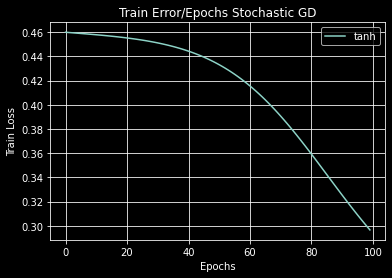

In [ ]:
nn_lr5 = NeuralNetwork(
        num_hidden = 1,
        num_neurons_per_layer = 15,
        activation_func_hidden = activation_hidden,
        num_neurons_out_layer=1,
        activation_func_output="softmax",
        opt_algo="SGD",
        loss_func="mean_square_error",
        learning_rate=0.5,
        num_epochs=NUM_EPOCHS)

nn_lr5.fit(X_train,Y_train)
train_acc, test_acc = nn_lr5.compute_accuracy(X_train, X_test, Y_train, Y_test)  #get training and test accuracy
print('Testing accuracy = ' + str(test_acc))
testing_accuracy.append(test_acc)
nn_lr5.plot()

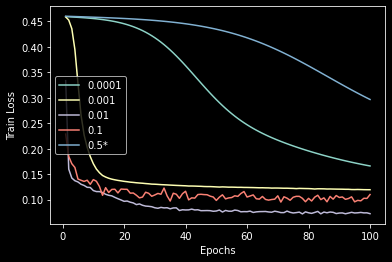

In [ ]:
    # sns.lineplot(list(range(1,101)),nn_lr1.training_error_sgd,hue='0.0001')
epochs = list(range(1,101))


plt.plot(epochs,nn_lr1.training_error_sgd,label=0.0001)
plt.plot(epochs,nn_lr2.training_error_sgd,label=0.001)
plt.plot(epochs,nn_lr3.training_error_sgd,label=0.01)
plt.plot(epochs,nn_lr4.training_error_sgd,label=0.1)
plt.plot(epochs,nn_lr5.training_error_sgd,label='0.5*')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.legend()

# Observations: 


*   Training error is minimized for learaning_rate 0.001 and 0.01 but has oscillations in large learning rates.



testing accuracy [0.8018234730849497, 0.8506508105239854, 0.8506508105239854, 0.8583082189653979, 0.5774586925360805]
learning_rates [0.0001, 0.001, 0.01, 0.1, 0.5]


Text(0, 0.5, 'testing_accuracy')

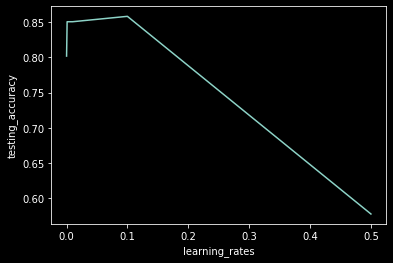

In [ ]:
print('testing accuracy',testing_accuracy)
print('learning_rates',learning_rates)

# l = list(range(0,0.5,0.1))
plt.plot(learning_rates,testing_accuracy)


plt.xlabel('learning_rates')
plt.ylabel('testing_accuracy')

# Observations: 
*   It can be evident that SGD model has better test accuracirs for learning rates 0.01,0.1 but then decreases for 0.5.

*   It is evident that learning rate that is too large can cause the model to converge too quickly to a suboptimal solution.




---



Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Fashion-MNIST using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each fashion class. **(5 points)**

2. Plot the distribution of number of images in each fashion class. Is the distribution uniform? Comment. **(5 points)**

3. Implememnt the 2D convolution function using a kernel size of 3x3. Use the [sobel kernel](https://en.wikipedia.org/wiki/Sobel_operator) and display the feature map for one example from each fashion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as $F_m = \sqrt(x^2 + y^2)$**(10 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(5 points)**
*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

3. Implement a custom cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. **(5 points)**

4. Compile and train your model with four different optimizers viz. SGD
RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**


In [ ]:
# import Fashion MNIST dataset
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
fashion_data = fashion_mnist.load_data() #load dataset
fashion_data

# print(len(fashion_data))

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

#Part01: 

DataSet Exploration & Display random image from each class 

In [ ]:
#Dataset Exploration
import numpy as np
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

unique_classes = np.unique(y_train)
print('unique_classes',unique_classes )

# sns.heatmap(fashion_data)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
unique_classes [0 1 2 3 4 5 6 7 8 9]


Displaying random images from each class

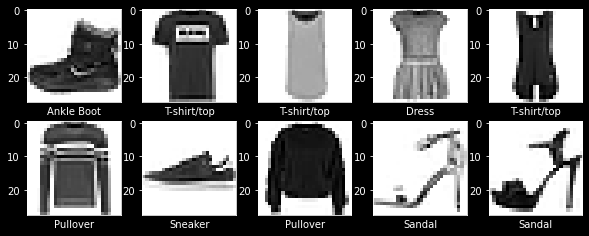

In [ ]:


# (train_images,train_labels),(test_images,test_labels)  = fashion_mnist.load_data()
# (x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

# print('X_train: ' + str(x_train.shape))
# print('Y_train: ' + str(y_train.shape))
# print('X_test:  '  + str(x_test.shape))
# print('Y_test:  '  + str(y_test.shape))


labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

x_train = x_train/255
x_test=x_test/255


plt.figure(figsize=(10,10))

train_images = []

for i in labels.keys():
    for index,j in enumerate(y_train):
        if j == i:
            plt.subplot(5,5,i+1)
            plt.xticks([])
            plt.xticks([])
            plt.grid(False)
            plt.imshow(x_train[j],cmap = plt.cm.binary)
            plt.xlabel(labels[y_train[i]])
            train_images.append(x_train[j])
            break
            
plt.show()



# train_images


# Part02: 

Plot the distribution of number of images in each fashion class.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


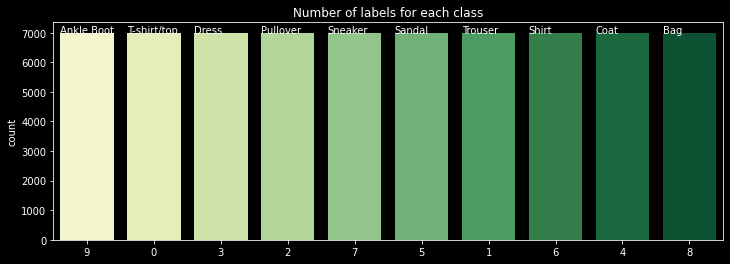

In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data, order = data.value_counts().index, palette='YlGn')
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data.value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
    

total_labels = np.concatenate((y_train,y_test))

# print(total_labels)
plot_label_per_class(pd.Index(total_labels))


# Observation:

* It can be inferred from the above plot that data distribution is unifrom for each class. As 7000 number of labels for each class are available.



# Part03:

Implememnt the 2D convolution function using a kernel size of 3x3

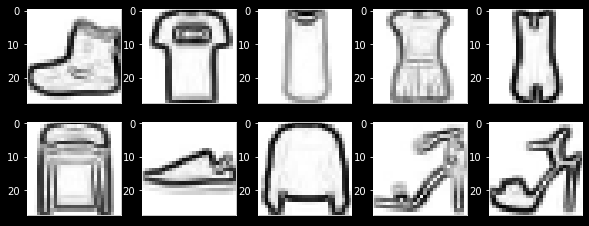

In [ ]:
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.
    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image
    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output
    
sobel_x = np.array([[-1, 0, 1], [-2,0, 2], [-1, 0, 1]])
sobel_y = np.array([[1,2, 1], [0,0, 0], [-1, -2, -1]])
plt.figure(figsize=(10,10))

for i in range(len(train_images)):
    image_sharpen_x = convolve2d(train_images[i], kernel= sobel_x)
    image_sharpen_y = convolve2d(train_images[i],kernel = sobel_y)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.xticks([])
    plt.grid(False)
    # cv2.imwrite(IMAGES_PATH + 'sharpened_image.jpg', image_shar)
    image_sharpen = np.sqrt(image_sharpen_x**2+image_sharpen_y**2)
    plt.imshow(image_sharpen,cmap = plt.cm.binary)
 
plt.show()


	



# Part04:

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# x_train = x_train.reshape((60000,28,28,1))
# x_test = x_test.reshape((10000,28,28,1))

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
# Model Structure

def structure_model():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    return model


In [ ]:
# Implement the loss (cross-entropy)

def cross_entropy(y,y_pre):
    loss =-tf.math.reduce_sum(y*tf.math.log(y_pre))
    return loss/float(y_pre.shape[1])


In [ ]:

model = structure_model()
model.compile(optimizer='Adam',loss= cross_entropy,metrics=['accuracy'])
history_adam = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))
model.summary()

Epoch 1/10
1875/1875 [==============================] - 77s 41ms/step - loss: 1.5930 - accuracy: 0.8187 - val_loss: 1.2369 - val_accuracy: 0.8645
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 1.1266 - accuracy: 0.8713 - val_loss: 1.1179 - val_accuracy: 0.8772
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 1.0030 - accuracy: 0.8856 - val_loss: 0.9851 - val_accuracy: 0.8920
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.9191 - accuracy: 0.8950 - val_loss: 0.9092 - val_accuracy: 0.8937
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.8656 - accuracy: 0.9010 - val_loss: 0.9093 - val_accuracy: 0.8965
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.8162 - accuracy: 0.9069 - val_loss: 0.8603 - val_accuracy: 0.9016
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.7851 - accuracy: 0.9109 - val_loss: 0.8610 -

In [ ]:
model = structure_model()
model.compile(optimizer='Adagrad',loss=cross_entropy,metrics=['accuracy'])
history_adagrad = model.fit(x_train, y_train, epochs=10,validation_data = (x_test,y_test))
model.summary()

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 4.0618 - accuracy: 0.5561 - val_loss: 2.6366 - val_accuracy: 0.7255
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 2.6085 - accuracy: 0.6996 - val_loss: 2.2973 - val_accuracy: 0.7426
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 2.3596 - accuracy: 0.7285 - val_loss: 2.1473 - val_accuracy: 0.7549
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 2.2096 - accuracy: 0.7445 - val_loss: 2.0481 - val_accuracy: 0.7636
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 2.1089 - accuracy: 0.7555 - val_loss: 1.9758 - val_accuracy: 0.7724
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 2.0331 - accuracy: 0.7635 - val_loss: 1.9210 - val_accuracy: 0.7796
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 1.9791 - accuracy: 0.7701 - val_loss: 1.8729 -

In [ ]:
model = structure_model()
model.compile(optimizer='SGD',loss=cross_entropy,metrics=['accuracy'])
history_sgd = model.fit(x_train, y_train, epochs=10,validation_data = (x_test,y_test))
model.summary()

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 2.2774 - accuracy: 0.7402 - val_loss: 1.6011 - val_accuracy: 0.8199
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 1.4998 - accuracy: 0.8304 - val_loss: 1.3872 - val_accuracy: 0.8462
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 1.3452 - accuracy: 0.8474 - val_loss: 1.2609 - val_accuracy: 0.8587
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 1.2437 - accuracy: 0.8600 - val_loss: 1.2233 - val_accuracy: 0.8640
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 1.1744 - accuracy: 0.8682 - val_loss: 1.1503 - val_accuracy: 0.8723
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 1.1145 - accuracy: 0.8733 - val_loss: 1.0759 - val_accuracy: 0.8803
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 1.0685 - accuracy: 0.8800 - val_loss: 1.0536 -

In [ ]:
model = structure_model()
model.compile(optimizer='RMSprop',loss=cross_entropy,metrics=['accuracy'])
history_rmsprop = model.fit(x_train, y_train, epochs=10,validation_data = (x_test,y_test))
model.summary()

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 1.5923 - accuracy: 0.8205 - val_loss: 1.2294 - val_accuracy: 0.8617
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 1.1168 - accuracy: 0.8752 - val_loss: 1.0805 - val_accuracy: 0.8806
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 1.0059 - accuracy: 0.8863 - val_loss: 0.9984 - val_accuracy: 0.8882
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.9356 - accuracy: 0.8949 - val_loss: 0.9669 - val_accuracy: 0.8923
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.8880 - accuracy: 0.8997 - val_loss: 0.9971 - val_accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.8653 - accuracy: 0.9028 - val_loss: 0.9057 - val_accuracy: 0.8999
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.8500 - accuracy: 0.9064 - val_loss: 0.9847 -

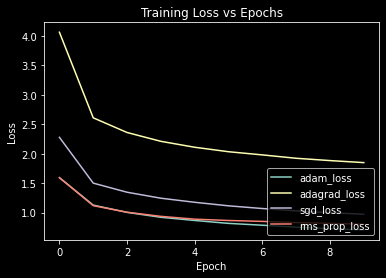

In [ ]:
plt.plot(history_adam.history['loss'], label='adam_loss')
plt.plot(history_adagrad.history['loss'], label = 'adagrad_loss')
plt.plot(history_sgd.history['loss'], label = 'sgd_loss')
plt.plot(history_rmsprop.history['loss'],label = 'rms_prop_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Observations:

*   It can be inferred from above plot Adam optimizer has shown best results as minimum loss as compared to others using this dataset.


*   It can be inferred from the plot Adagrad optimizer has worst performance as maximum loss as compared to others.








# Part 06: 
Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis.

In [ ]:
# 3 conv 2d layers  
# dropout rate 0.25

def structure_model_with_3_conv_layers():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.45))
    model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.45))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    return model

In [ ]:
model = structure_model_with_3_conv_layers()
model.compile(optimizer='Adam',loss= cross_entropy,metrics=['accuracy'])
history_adam = model.fit(x_train, y_train,  epochs=10,validation_data = (x_test,y_test))
model.summary()

# plot_train_test_loss(history_adam['loss'],history_adam['val_loss'])
# plot_train_test_accuracy(history_adam['acc'],history_adam['val_acc'])


Epoch 1/10
1875/1875 [==============================] - 124s 66ms/step - loss: 1.7817 - accuracy: 0.7947 - val_loss: 1.2128 - val_accuracy: 0.8660
Epoch 2/10
1875/1875 [==============================] - 124s 66ms/step - loss: 1.2063 - accuracy: 0.8627 - val_loss: 1.0328 - val_accuracy: 0.8868
Epoch 3/10
1875/1875 [==============================] - 124s 66ms/step - loss: 1.0798 - accuracy: 0.8757 - val_loss: 0.9263 - val_accuracy: 0.8979
Epoch 4/10
1875/1875 [==============================] - 124s 66ms/step - loss: 1.0099 - accuracy: 0.8845 - val_loss: 0.9199 - val_accuracy: 0.8996
Epoch 5/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.9603 - accuracy: 0.8896 - val_loss: 0.8821 - val_accuracy: 0.9019
Epoch 6/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.9274 - accuracy: 0.8949 - val_loss: 0.8465 - val_accuracy: 0.9050
Epoch 7/10
1875/1875 [==============================] - 125s 66ms/step - loss: 0.9082 - accuracy: 0.8983 - val_loss: 0

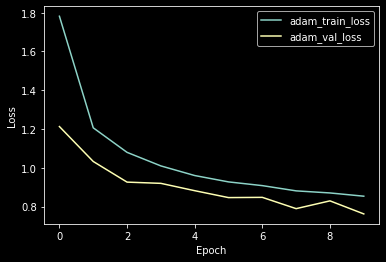

In [ ]:
plt.plot(history_adam.history['loss'], label='adam_train_loss')
plt.plot(history_adam.history['val_loss'], label= 'adam_val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

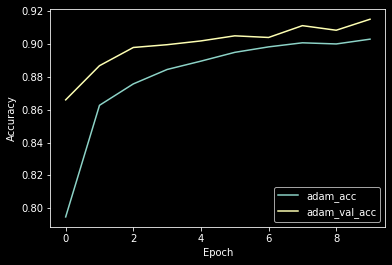

In [ ]:
plt.plot(history_adam.history['accuracy'], label='adam_acc')
plt.plot(history_adam.history['val_accuracy'], label='adam_val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# Hyperparameters

# 4 conv 2d layers and dropout rate = 0.5

def structure_model_with_4_conv_layers():
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    return model


In [ ]:
# Compile and fit the model

model = structure_model_with_4_conv_layers()
model.compile(optimizer='Adam',loss= cross_entropy,metrics=['accuracy'])
history_adam = model.fit(x_train, y_train, epochs=10,validation_data = (x_test,y_test))
model.summary()

# plot_train_test_loss(history_adam['loss'],history_adam['val_loss'])
# plot_train_test_accuracy(history_adam['acc'],history_adam['val_acc'])

Epoch 1/10
1875/1875 [==============================] - 134s 71ms/step - loss: 2.0472 - accuracy: 0.7632 - val_loss: 1.4294 - val_accuracy: 0.8344
Epoch 2/10
1875/1875 [==============================] - 132s 70ms/step - loss: 1.3425 - accuracy: 0.8443 - val_loss: 1.1182 - val_accuracy: 0.8713
Epoch 3/10
1875/1875 [==============================] - 131s 70ms/step - loss: 1.1715 - accuracy: 0.8653 - val_loss: 1.0435 - val_accuracy: 0.8811
Epoch 4/10
1875/1875 [==============================] - 131s 70ms/step - loss: 1.0884 - accuracy: 0.8751 - val_loss: 0.9696 - val_accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 131s 70ms/step - loss: 1.0137 - accuracy: 0.8830 - val_loss: 0.9431 - val_accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.9696 - accuracy: 0.8878 - val_loss: 0.8888 - val_accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.9282 - accuracy: 0.8936 - val_loss: 0

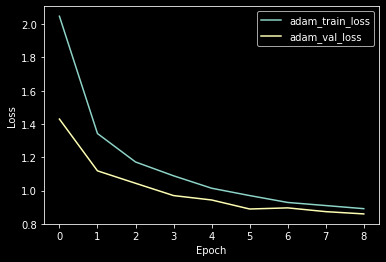

In [ ]:
plt.plot(history_adam.history['loss'], label='adam_train_loss')
plt.plot(history_adam.history['val_loss'], label= 'adam_val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

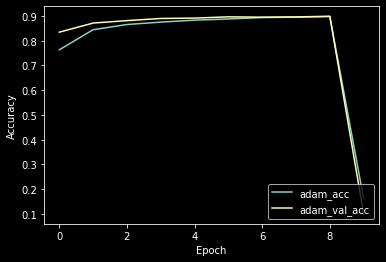

In [ ]:
plt.plot(history_adam.history['accuracy'], label='adam_acc')
plt.plot(history_adam.history['val_accuracy'], label='adam_val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Challenges & Observations : 

*  The addition of one Conv2D layer and maxpooling layer although makes the model complex but also training time increases but can have the ability to produce some good result using this dataset.
*  With 3 conv2D layers and dropout rate 0.45 there is an improvment in classification performance.
*  With 4 conv2D layers and dropout rate 0.5 the accuracy of the model decreased so classification improvement. 